In [1]:
import gym
import numpy as np
from tqdm import tqdm
from stable_baselines3.common.env_util import make_vec_env

In [2]:
import torch

In [3]:
from src.models.a2c import A2C
from src.models.sac import SAC
from src.configs import cfg_from_yaml_file

In [4]:
vec_env = make_vec_env("Humanoid-v4", n_envs=1)
cfg = cfg_from_yaml_file(r"C:\Users\xavier\Documents\2-Code\0-Thesis\PayGround\src\configs\config.yaml")
a2c = A2C(vec_env, cfg.MODELS.A2C)

config C:\Users\xavier\Documents\2-Code\0-Thesis\PayGround\src\configs\config.yaml


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sac = SAC(vec_env, cfg.MODELS.SAC, device)

In [10]:
#losses = a2c.learn(total_timesteps=10000)
losses = sac.learn(total_timesteps=3000)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 2999/2999 [18:28<00:00,  2.70it/s]


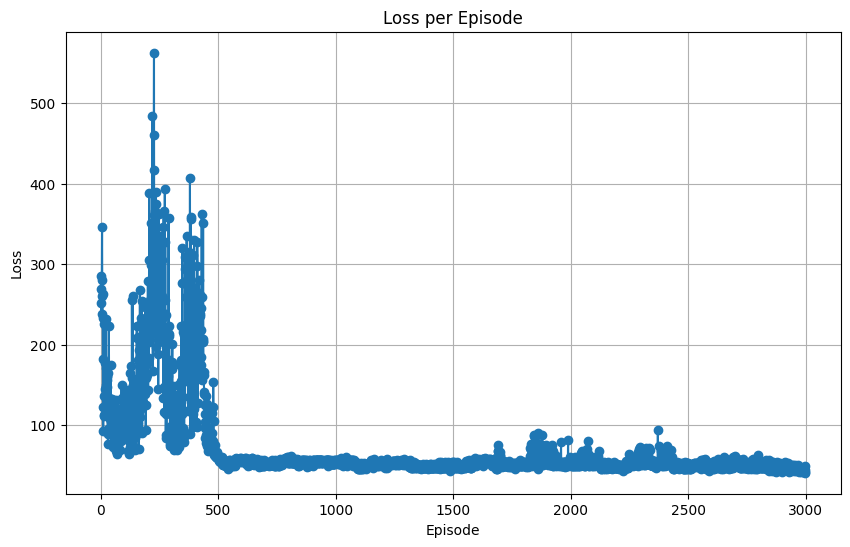

In [11]:
import matplotlib.pyplot as plt
episodes = list(range(1, len(losses) + 1))

plt.figure(figsize=(10, 6))
plt.plot(episodes, losses, marker='o')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Loss per Episode')
plt.grid(True) 
plt.show() 